#**TUGAS AKHIR SUBA - THOHIROTUN**
**Menganalisa Data Kesehatan Mental Siswa**

Data yang digunakan:
https://www.kaggle.com/datasets/utkarshsharma11r/student-mental-health-analysis

### Mengunggah file dari drive lokal ke Colab

Anda dapat menggunakan `google.colab.files` untuk mengunggah file secara langsung dari komputer lokal Anda ke sesi Colab saat ini.

# Task
Analyze the student mental health data from `StudentMentalHealth_dirty.csv` by performing data loading, cleaning, transformation, exploratory data analysis, and visualization, then summarize the findings and draw conclusions.

## Membaca Data dan Mengimpor Library

### Subtask:
Mengimpor semua library Python yang diperlukan seperti pandas dan membaca file CSV 'StudentMentalHealth_dirty.csv' ke dalam DataFrame.


**Reasoning**:
First, I will import the pandas library, which is essential for data manipulation in Python, then I will read the 'StudentMentalHealth_dirty.csv' file into a DataFrame named `df`.



In [ ]:
import pandas as pd

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('/content/StudentMentalHealth_dirty.csv')

# Menampilkan 5 baris pertama dari DataFrame untuk verifikasi
print("DataFrame 'df' berhasil dibuat dengan 5 baris pertama:")
print(df.head())

DataFrame 'df' berhasil dibuat dengan 5 baris pertama:
     Name  Gender   Age Education Level Screen Time (hrs/day)  \
0   Aarav    Male  15.0         Class 8                   7.1   
1   Meera  Female  25.0             MSc                   3.3   
2  Ishaan    Male  20.0           BTech                   9.5   
3  Aditya    Male  20.0              BA                  10.8   
4   Anika  Female  17.0        Class 11                   2.8   

   Sleep Duration (hrs)  Physical Activity (hrs/week) Stress Level  \
0                  8.90                          9.30       Medium   
1                 -5.00                          0.20       Medium   
2                150.00                          6.20       Medium   
3                  5.60                          5.50         High   
4                  5.40                          3.10       Medium   

  Anxious Before Exams Academic Performance Change  
0                   No                        Same  
1                   No     

## Pembersihan Data

### Subtask:
Melakukan pembersihan data, termasuk menangani nilai yang hilang, duplikat, dan mengoreksi tipe data yang tidak sesuai.


## Pembersihan Data

### Subtask:
Melakukan pembersihan data, termasuk menangani nilai yang hilang, duplikat, dan mengoreksi tipe data yang tidak sesuai.

### Analisis Awal Data
Sebelum melakukan pembersihan data secara mendalam, penting untuk memahami struktur dan kualitas data yang ada. Langkah ini melibatkan pemeriksaan informasi umum, mengidentifikasi nilai yang hilang, dan mendeteksi duplikat.

#### Instructions
1. Periksa informasi umum DataFrame `df` menggunakan metode `.info()` untuk melihat tipe data dan jumlah nilai non-null di setiap kolom.
2. Periksa jumlah nilai yang hilang di setiap kolom menggunakan `.isnull().sum()`.
3. Periksa jumlah baris duplikat dalam DataFrame menggunakan `.duplicated().sum()`.
4. Identifikasi dan tangani nilai-nilai yang tidak konsisten atau di luar rentang yang masuk akal pada kolom numerik ('Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)'). Periksa juga nilai unik pada kolom kategorikal ('Gender', 'Education Level', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change') untuk mengidentifikasi inkonsistensi.

**Reasoning**:
Following the instructions, I will first display general information about the DataFrame `df` using `.info()` to understand its structure, data types, and non-null counts.



In [ ]:
print("Informasi umum DataFrame:")
df.info()

Informasi umum DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1240 non-null   object 
 1   Gender                        1239 non-null   object 
 2   Age                           1240 non-null   object 
 3   Education Level               1240 non-null   object 
 4   Screen Time (hrs/day)         1236 non-null   object 
 5   Sleep Duration (hrs)          1232 non-null   float64
 6   Physical Activity (hrs/week)  1243 non-null   float64
 7   Stress Level                  1238 non-null   object 
 8   Anxious Before Exams          1233 non-null   object 
 9   Academic Performance Change   1235 non-null   object 
dtypes: float64(2), object(8)
memory usage: 97.8+ KB


**Reasoning**:
Following the instructions, I will now check the count of missing values in each column using `.isnull().sum()` to identify columns with missing data.



In [ ]:
print("Jumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang di setiap kolom:
Name                            10
Gender                          11
Age                             10
Education Level                 10
Screen Time (hrs/day)           14
Sleep Duration (hrs)            18
Physical Activity (hrs/week)     7
Stress Level                    12
Anxious Before Exams            17
Academic Performance Change     15
dtype: int64


**Reasoning**:
Following the instructions, I will now check the number of duplicate rows in the DataFrame using `.duplicated().sum()` to identify if there are any redundant entries.



In [ ]:
print("Jumlah baris duplikat:")
print(df.duplicated().sum())

Jumlah baris duplikat:
178


**Reasoning**:
Following the instructions, I need to identify and handle inconsistent or out-of-range values in the numerical columns and check unique values in categorical columns. I will start by examining the 'Age' column, which is currently of object type. I will first attempt to convert it to a numeric type, forcing any errors to NaN, and then display the unique non-numeric values that prevented a clean conversion.



In [ ]:
print("Unique non-numeric values in 'Age' column before conversion:")
# Convert 'Age' to numeric, coercing errors to NaN
df['Age_numeric'] = pd.to_numeric(df['Age'], errors='coerce')
# Find values that could not be converted
non_numeric_age = df[df['Age_numeric'].isnull() & df['Age'].notnull()]['Age'].unique()
print(non_numeric_age)

Unique non-numeric values in 'Age' column before conversion:
['twenty']


**Reasoning**:
Since 'twenty' was identified as a non-numeric value in the 'Age' column, I will replace it with its numeric equivalent '20' to enable proper type conversion.



In [ ]:
df['Age'] = df['Age'].replace('twenty', '20')
print("Value 'twenty' in 'Age' column replaced with '20'.")
print(df[df['Age'] == 'twenty'])

Value 'twenty' in 'Age' column replaced with '20'.
Empty DataFrame
Columns: [Name, Gender, Age, Education Level, Screen Time (hrs/day), Sleep Duration (hrs), Physical Activity (hrs/week), Stress Level, Anxious Before Exams, Academic Performance Change, Age_numeric]
Index: []


**Reasoning**:
After replacing 'twenty' with '20', I will now convert the 'Age' column to a numeric type, forcing any non-convertible values to NaN, and then display its descriptive statistics to check for any out-of-range values.



In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
print("Descriptive statistics for 'Age' column after conversion:")
print(df['Age'].describe())

Descriptive statistics for 'Age' column after conversion:
count   1240.00
mean      21.53
std       15.43
min        1.00
25%       17.00
50%       20.00
75%       23.00
max      200.00
Name: Age, dtype: float64


**Reasoning**:
Based on the descriptive statistics, the 'Age' column contains values like 1 and 200, which are highly unrealistic for students. I will identify and count these out-of-range values (e.g., ages below 10 or above 30) to understand the extent of the issue before deciding on a cleaning strategy.



In [ ]:
unrealistic_age_count = df[(df['Age'] < 10) | (df['Age'] > 30)]['Age'].count()
print(f"Number of unrealistic 'Age' values (less than 10 or greater than 30): {unrealistic_age_count}")

Number of unrealistic 'Age' values (less than 10 or greater than 30): 24


**Reasoning**:
Since 24 unrealistic age values (less than 10 or greater than 30) have been identified, I will replace these values with `NaN` to indicate they are invalid entries and will need further handling during the missing value imputation phase.



In [ ]:
import numpy as np
df.loc[(df['Age'] < 10) | (df['Age'] > 30), 'Age'] = np.nan
print("Unrealistic 'Age' values (less than 10 or greater than 30) have been replaced with NaN.")
print(f"New count of NaN in 'Age' column: {df['Age'].isnull().sum()}")

Unrealistic 'Age' values (less than 10 or greater than 30) have been replaced with NaN.
New count of NaN in 'Age' column: 34


**Reasoning**:
Following the data cleaning instructions, I will now examine the 'Screen Time (hrs/day)' column, which is currently of object type. I will attempt to convert it to a numeric type, coercing errors to NaN, and then display any unique non-numeric values that prevented a clean conversion.



In [ ]:
print("Unique non-numeric values in 'Screen Time (hrs/day)' column before conversion:")
df['Screen Time (hrs/day)_numeric'] = pd.to_numeric(df['Screen Time (hrs/day)'], errors='coerce')
non_numeric_screen_time = df[df['Screen Time (hrs/day)_numeric'].isnull() & df['Screen Time (hrs/day)'].notnull()]['Screen Time (hrs/day)'].unique()
print(non_numeric_screen_time)

Unique non-numeric values in 'Screen Time (hrs/day)' column before conversion:
['unknown']


**Reasoning**:
Since 'unknown' was identified as a non-numeric value in the 'Screen Time (hrs/day)' column, I will replace it with NaN to facilitate proper type conversion and later handling of missing values.



In [ ]:
df['Screen Time (hrs/day)'] = df['Screen Time (hrs/day)'].replace('unknown', np.nan)
print("Value 'unknown' in 'Screen Time (hrs/day)' column replaced with NaN.")
print(f"New count of NaN in 'Screen Time (hrs/day)' column: {df['Screen Time (hrs/day)'].isnull().sum()}")

Value 'unknown' in 'Screen Time (hrs/day)' column replaced with NaN.
New count of NaN in 'Screen Time (hrs/day)' column: 15


**Reasoning**:
After replacing 'unknown' with NaN, I will now convert the 'Screen Time (hrs/day)' column to a numeric type, forcing any non-convertible values to NaN, and then display its descriptive statistics to check for any out-of-range values.



In [ ]:
df['Screen Time (hrs/day)'] = pd.to_numeric(df['Screen Time (hrs/day)'], errors='coerce')
print("Descriptive statistics for 'Screen Time (hrs/day)' column after conversion:")
print(df['Screen Time (hrs/day)'].describe())

Descriptive statistics for 'Screen Time (hrs/day)' column after conversion:
count   1235.00
mean       8.17
std       13.47
min       -5.00
25%        4.40
50%        6.90
75%        9.50
max      150.00
Name: Screen Time (hrs/day), dtype: float64


**Reasoning**:
Based on the descriptive statistics, the 'Screen Time (hrs/day)' column contains unrealistic values like -5.00 and 150.00. I will identify and count these out-of-range values (e.g., negative values or values greater than 24) to understand the extent of the issue before deciding on a cleaning strategy.



In [ ]:
unrealistic_screen_time_count = df[(df['Screen Time (hrs/day)'] < 0) | (df['Screen Time (hrs/day)'] > 24)]['Screen Time (hrs/day)'].count()
print(f"Number of unrealistic 'Screen Time (hrs/day)' values (less than 0 or greater than 24): {unrealistic_screen_time_count}")

Number of unrealistic 'Screen Time (hrs/day)' values (less than 0 or greater than 24): 21


**Reasoning**:
Since 21 unrealistic screen time values (less than 0 or greater than 24) have been identified, I will replace these values with `NaN` to indicate they are invalid entries and will need further handling during the missing value imputation phase.



In [ ]:
df.loc[(df['Screen Time (hrs/day)'] < 0) | (df['Screen Time (hrs/day)'] > 24), 'Screen Time (hrs/day)'] = np.nan
print("Unrealistic 'Screen Time (hrs/day)' values (less than 0 or greater than 24) have been replaced with NaN.")
print(f"New count of NaN in 'Screen Time (hrs/day)' column: {df['Screen Time (hrs/day)'].isnull().sum()}")

Unrealistic 'Screen Time (hrs/day)' values (less than 0 or greater than 24) have been replaced with NaN.
New count of NaN in 'Screen Time (hrs/day)' column: 36


**Reasoning**:
Following the data cleaning instructions, I will now examine the 'Sleep Duration (hrs)' column. I will first display its descriptive statistics to check for any out-of-range values, as it is already a numeric type (float64).



In [ ]:
print("Descriptive statistics for 'Sleep Duration (hrs)' column:")
print(df['Sleep Duration (hrs)'].describe())

Descriptive statistics for 'Sleep Duration (hrs)' column:
count   1232.00
mean       8.20
std       15.18
min       -5.00
25%        5.10
50%        6.50
75%        7.80
max      150.00
Name: Sleep Duration (hrs), dtype: float64


## Pembersihan Data

### Subtask:
Identifikasi dan tangani nilai-nilai yang tidak konsisten atau di luar rentang yang masuk akal pada kolom 'Sleep Duration (hrs)'.


**Reasoning**:
Based on the descriptive statistics, the 'Sleep Duration (hrs)' column contains unrealistic values like -5.00 and 150.00. I will identify and count these out-of-range values (e.g., negative values or values greater than 15) to understand the extent of the issue before deciding on a cleaning strategy, as per the instructions.



In [ ]:
unrealistic_sleep_duration_count = df[(df['Sleep Duration (hrs)'] < 0) | (df['Sleep Duration (hrs)'] > 15)]['Sleep Duration (hrs)'].count()
print(f"Number of unrealistic 'Sleep Duration (hrs)' values (less than 0 or greater than 15): {unrealistic_sleep_duration_count}")

Number of unrealistic 'Sleep Duration (hrs)' values (less than 0 or greater than 15): 31


**Reasoning**:
Since 31 unrealistic sleep duration values (less than 0 or greater than 15) have been identified, I will replace these values with `NaN` to indicate they are invalid entries and will need further handling during the missing value imputation phase.



In [ ]:
df.loc[(df['Sleep Duration (hrs)'] < 0) | (df['Sleep Duration (hrs)'] > 15), 'Sleep Duration (hrs)'] = np.nan
print("Unrealistic 'Sleep Duration (hrs)' values (less than 0 or greater than 15) have been replaced with NaN.")
print(f"New count of NaN in 'Sleep Duration (hrs)' column: {df['Sleep Duration (hrs)'].isnull().sum()}")

Unrealistic 'Sleep Duration (hrs)' values (less than 0 or greater than 15) have been replaced with NaN.
New count of NaN in 'Sleep Duration (hrs)' column: 49


**Reasoning**:
Following the data cleaning instructions, I will now examine the 'Physical Activity (hrs/week)' column. I will first display its descriptive statistics to check for any out-of-range values, as it is already a numeric type (float64).



In [ ]:
print("Descriptive statistics for 'Physical Activity (hrs/week)' column:")
print(df['Physical Activity (hrs/week)'].describe())

Descriptive statistics for 'Physical Activity (hrs/week)' column:
count   1243.00
mean       7.03
std       16.19
min       -5.00
25%        2.70
50%        5.10
75%        7.70
max      150.00
Name: Physical Activity (hrs/week), dtype: float64


**Reasoning**:
Based on the descriptive statistics, the 'Physical Activity (hrs/week)' column contains unrealistic values like -5.00 and 150.00. I will identify and count these out-of-range values (e.g., negative values or values greater than 20) to understand the extent of the issue before deciding on a cleaning strategy.



In [ ]:
unrealistic_physical_activity_count = df[(df['Physical Activity (hrs/week)'] < 0) | (df['Physical Activity (hrs/week)'] > 20)]['Physical Activity (hrs/week)'].count()
print(f"Number of unrealistic 'Physical Activity (hrs/week)' values (less than 0 or greater than 20): {unrealistic_physical_activity_count}")

Number of unrealistic 'Physical Activity (hrs/week)' values (less than 0 or greater than 20): 28


**Reasoning**:
Since 28 unrealistic physical activity values (less than 0 or greater than 20) have been identified, I will replace these values with `NaN` to indicate they are invalid entries and will need further handling during the missing value imputation phase.



In [ ]:
df.loc[(df['Physical Activity (hrs/week)'] < 0) | (df['Physical Activity (hrs/week)'] > 20), 'Physical Activity (hrs/week)'] = np.nan
print("Unrealistic 'Physical Activity (hrs/week)' values (less than 0 or greater than 20) have been replaced with NaN.")
print(f"New count of NaN in 'Physical Activity (hrs/week)' column: {df['Physical Activity (hrs/week)'].isnull().sum()}")

Unrealistic 'Physical Activity (hrs/week)' values (less than 0 or greater than 20) have been replaced with NaN.
New count of NaN in 'Physical Activity (hrs/week)' column: 35


**Reasoning**:
Following the data cleaning instructions, I will now examine the categorical columns for inconsistencies. I will start by displaying the unique values in the 'Gender' column to identify any non-standard entries.



In [ ]:
print("Unique values in 'Gender' column:")
print(df['Gender'].unique())

Unique values in 'Gender' column:
['Male' 'Female' nan 'Other']


**Reasoning**:
Since the unique values in the 'Gender' column ('Male', 'Female', 'Other', NaN) are consistent and reasonable, I will now proceed to examine the next categorical column, 'Education Level', to identify any non-standard or inconsistent entries.



In [ ]:
print("Unique values in 'Education Level' column:")
print(df['Education Level'].unique())

Unique values in 'Education Level' column:
['Class 8' 'MSc' 'BTech' 'BA' 'Class 11' 'MTech' 'Class 9' 'Class 10' 'MA'
 'BSc' 'Class 12' nan]


**Reasoning**:
Since the unique values in the 'Education Level' column appear reasonable, I will now proceed to examine the 'Stress Level' column to identify any non-standard or inconsistent entries.



In [ ]:
print("Unique values in 'Stress Level' column:")
print(df['Stress Level'].unique())

Unique values in 'Stress Level' column:
['Medium' 'High' 'Low' nan]


**Reasoning**:
Since the unique values in the 'Stress Level' column ('Medium', 'High', 'Low', NaN) are consistent and reasonable, I will now proceed to examine the 'Anxious Before Exams' column to identify any non-standard or inconsistent entries.



In [ ]:
print("Unique values in 'Anxious Before Exams' column:")
print(df['Anxious Before Exams'].unique())

Unique values in 'Anxious Before Exams' column:
['No' 'Yes' nan]


**Reasoning**:
Since the unique values in the 'Anxious Before Exams' column ('No', 'Yes', NaN) are consistent and reasonable, I will now proceed to examine the 'Academic Performance Change' column to identify any non-standard or inconsistent entries.



In [ ]:
print("Unique values in 'Academic Performance Change' column:")
print(df['Academic Performance Change'].unique())

Unique values in 'Academic Performance Change' column:
['Same' 'Improved' 'Declined' nan]


**Reasoning**:
Now that all columns have been inspected for inconsistent values and out-of-range numerical entries have been addressed, the next step in data cleaning is to remove duplicate rows from the DataFrame, as identified in an earlier step.



In [ ]:
df.drop_duplicates(inplace=True)
print(f"Jumlah baris duplikat setelah penghapusan: {df.duplicated().sum()}")

Jumlah baris duplikat setelah penghapusan: 0


**Reasoning**:
Before proceeding with handling missing values, it is crucial to get an updated count of all null values in the DataFrame after all previous cleaning steps (handling inconsistent values, out-of-range numerical values, and duplicates) to understand the current data completeness.



In [ ]:
print("Jumlah nilai yang hilang di setiap kolom setelah pembersihan awal:")
print(df.isnull().sum())

Jumlah nilai yang hilang di setiap kolom setelah pembersihan awal:
Name                             10
Gender                           11
Age                              34
Education Level                  10
Screen Time (hrs/day)            36
Sleep Duration (hrs)             48
Physical Activity (hrs/week)     35
Stress Level                     12
Anxious Before Exams             17
Academic Performance Change      15
Age_numeric                      11
Screen Time (hrs/day)_numeric    15
dtype: int64


**Reasoning**:
The columns 'Age_numeric' and 'Screen Time (hrs/day)_numeric' were temporary columns created for type conversion and identifying non-numeric values. They are no longer needed after cleaning and converting the 'Age' and 'Screen Time (hrs/day)' columns, so I will drop them to streamline the DataFrame.



In [ ]:
df = df.drop(columns=['Age_numeric', 'Screen Time (hrs/day)_numeric'])
print("Columns 'Age_numeric' and 'Screen Time (hrs/day)_numeric' dropped.")
print("Updated DataFrame columns:")
print(df.columns)

Columns 'Age_numeric' and 'Screen Time (hrs/day)_numeric' dropped.
Updated DataFrame columns:
Index(['Name', 'Gender', 'Age', 'Education Level', 'Screen Time (hrs/day)',
       'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Stress Level',
       'Anxious Before Exams', 'Academic Performance Change'],
      dtype='object')


**Reasoning**:
Now that temporary columns have been removed, the next step in data cleaning is to handle the remaining missing values. I will start by imputing the missing values in numerical columns ('Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)') with their respective medians, as the median is less sensitive to outliers that might still exist.



In [ ]:
numerical_cols = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']
for col in numerical_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Missing values in '{col}' filled with median: {median_val}")

print("\nMissing values after numerical imputation:")
print(df[numerical_cols].isnull().sum())

Missing values in 'Age' filled with median: 20.0
Missing values in 'Screen Time (hrs/day)' filled with median: 6.9
Missing values in 'Sleep Duration (hrs)' filled with median: 6.5
Missing values in 'Physical Activity (hrs/week)' filled with median: 5.0

Missing values after numerical imputation:
Age                             0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
dtype: int64


/tmp/ipython-input-3230275305.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


**Reasoning**:
The previous code generated a `FutureWarning` due to chained assignment with `inplace=True`. To ensure the DataFrame is modified correctly and suppress the warning, I will explicitly assign the result of `fillna` back to the column.



In [ ]:
numerical_cols = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']
for col in numerical_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"Missing values in '{col}' filled with median: {median_val}")

print("\nMissing values after numerical imputation:")
print(df[numerical_cols].isnull().sum())

Missing values in 'Age' filled with median: 20.0
Missing values in 'Screen Time (hrs/day)' filled with median: 6.9
Missing values in 'Sleep Duration (hrs)' filled with median: 6.5
Missing values in 'Physical Activity (hrs/week)' filled with median: 5.0

Missing values after numerical imputation:
Age                             0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
dtype: int64


**Reasoning**:
Now that numerical columns have had their missing values imputed, I will proceed to impute missing values in categorical columns ('Gender', 'Education Level', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change'). I will use the mode (most frequent value) for imputation, as it is a suitable strategy for categorical data.



In [ ]:
categorical_cols_to_impute = ['Gender', 'Education Level', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change']

for col in categorical_cols_to_impute:
    mode_val = df[col].mode()[0] # .mode() returns a Series, so take the first element
    df[col].fillna(mode_val, inplace=True)
    print(f"Missing values in '{col}' filled with mode: {mode_val}")

print("\nMissing values after categorical imputation:")
print(df[categorical_cols_to_impute].isnull().sum())

Missing values in 'Gender' filled with mode: Female
Missing values in 'Education Level' filled with mode: MSc
Missing values in 'Stress Level' filled with mode: Medium
Missing values in 'Anxious Before Exams' filled with mode: Yes
Missing values in 'Academic Performance Change' filled with mode: Same

Missing values after categorical imputation:
Gender                         0
Education Level                0
Stress Level                   0
Anxious Before Exams           0
Academic Performance Change    0
dtype: int64


/tmp/ipython-input-2995617438.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


## Verify final data cleaning state

### Subtask:
Verifikasi status akhir pembersihan data, termasuk memastikan tidak ada nilai yang hilang dan semua tipe data sudah sesuai.


**Reasoning**:
To verify the final data cleaning state, I will first check for any remaining missing values using `isnull().sum()`, then confirm the data types with `info()`, and finally display the first few rows of the cleaned DataFrame to observe the changes.



In [ ]:
print("Jumlah nilai yang hilang di setiap kolom setelah pembersihan akhir:")
print(df.isnull().sum())

print("\nInformasi umum DataFrame setelah pembersihan akhir:")
df.info()

print("\n5 baris pertama DataFrame setelah pembersihan akhir:")
print(df.head())

Jumlah nilai yang hilang di setiap kolom setelah pembersihan akhir:
Name                            10
Gender                           0
Age                              0
Education Level                  0
Screen Time (hrs/day)            0
Sleep Duration (hrs)             0
Physical Activity (hrs/week)     0
Stress Level                     0
Anxious Before Exams             0
Academic Performance Change      0
dtype: int64

Informasi umum DataFrame setelah pembersihan akhir:
<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1061 non-null   object 
 1   Gender                        1071 non-null   object 
 2   Age                           1071 non-null   float64
 3   Education Level               1071 non-null   object 
 4   Screen Time (hrs/day)         1071 non-null   float64
 

## Transformasi Data

### Subtask:
Melakukan transformasi data yang diperlukan, seperti rekayasa fitur, pembuatan kolom baru, atau encoding variabel kategorikal jika relevan.


**Reasoning**:
As instructed, the 'Name' column is not relevant for analysis and should be dropped from the DataFrame to streamline the dataset.



In [ ]:
df = df.drop(columns=['Name'])
print("Column 'Name' dropped.")
print("Updated DataFrame columns:")
print(df.columns)

Column 'Name' dropped.
Updated DataFrame columns:
Index(['Gender', 'Age', 'Education Level', 'Screen Time (hrs/day)',
       'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Stress Level',
       'Anxious Before Exams', 'Academic Performance Change'],
      dtype='object')


**Reasoning**:
As instructed, I will encode the 'Stress Level' column using ordinal mapping, assigning 'Low' to 0, 'Medium' to 1, and 'High' to 2, to convert this categorical variable into a numerical one for analysis.



In [ ]:
stress_level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Stress Level Encoded'] = df['Stress Level'].map(stress_level_mapping)
print("Original 'Stress Level' column unique values:")
print(df['Stress Level'].unique())
print("Encoded 'Stress Level Encoded' column unique values:")
print(df['Stress Level Encoded'].unique())

Original 'Stress Level' column unique values:
['Medium' 'High' 'Low']
Encoded 'Stress Level Encoded' column unique values:
[1 2 0]


**Reasoning**:
As instructed, I will encode the 'Anxious Before Exams' column using binary mapping, assigning 'No' to 0 and 'Yes' to 1, to convert this categorical variable into a numerical one for analysis.



In [ ]:
anxious_mapping = {'No': 0, 'Yes': 1}
df['Anxious Before Exams Encoded'] = df['Anxious Before Exams'].map(anxious_mapping)
print("Original 'Anxious Before Exams' column unique values:")
print(df['Anxious Before Exams'].unique())
print("Encoded 'Anxious Before Exams Encoded' column unique values:")
print(df['Anxious Before Exams Encoded'].unique())

Original 'Anxious Before Exams' column unique values:
['No' 'Yes']
Encoded 'Anxious Before Exams Encoded' column unique values:
[0 1]


**Reasoning**:
As instructed, I will encode the 'Academic Performance Change' column using ordinal mapping, assigning 'Declined' to 0, 'Same' to 1, and 'Improved' to 2, to convert this categorical variable into a numerical one for analysis.



In [ ]:
academic_performance_mapping = {'Declined': 0, 'Same': 1, 'Improved': 2}
df['Academic Performance Change Encoded'] = df['Academic Performance Change'].map(academic_performance_mapping)
print("Original 'Academic Performance Change' column unique values:")
print(df['Academic Performance Change'].unique())
print("Encoded 'Academic Performance Change Encoded' column unique values:")
print(df['Academic Performance Change Encoded'].unique())

Original 'Academic Performance Change' column unique values:
['Same' 'Improved' 'Declined']
Encoded 'Academic Performance Change Encoded' column unique values:
[1 2 0]


**Reasoning**:
As instructed, I will apply one-hot encoding to the 'Gender' column using `pd.get_dummies()` to convert its categorical values into numerical format, which is a common practice for handling nominal categorical features in machine learning models.



In [ ]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
print("DataFrame after one-hot encoding 'Gender' column:")
print(df.head())

DataFrame after one-hot encoding 'Gender' column:
    Age Education Level  Screen Time (hrs/day)  Sleep Duration (hrs)  \
0 15.00         Class 8                   7.10                  8.90   
1 25.00             MSc                   3.30                  6.50   
2 20.00           BTech                   9.50                  6.50   
3 20.00              BA                  10.80                  5.60   
4 17.00        Class 11                   2.80                  5.40   

   Physical Activity (hrs/week) Stress Level Anxious Before Exams  \
0                          9.30       Medium                   No   
1                          0.20       Medium                   No   
2                          6.20       Medium                   No   
3                          5.50         High                  Yes   
4                          3.10       Medium                  Yes   

  Academic Performance Change  Stress Level Encoded  \
0                        Same                  

**Reasoning**:
As instructed, I will apply one-hot encoding to the 'Education Level' column using `pd.get_dummies()` to convert its categorical values into numerical format, which is a common practice for handling nominal categorical features.



In [ ]:
df = pd.get_dummies(df, columns=['Education Level'], prefix='Education_Level')
print("DataFrame after one-hot encoding 'Education Level' column:")
print(df.head())

DataFrame after one-hot encoding 'Education Level' column:
    Age  Screen Time (hrs/day)  Sleep Duration (hrs)  \
0 15.00                   7.10                  8.90   
1 25.00                   3.30                  6.50   
2 20.00                   9.50                  6.50   
3 20.00                  10.80                  5.60   
4 17.00                   2.80                  5.40   

   Physical Activity (hrs/week) Stress Level Anxious Before Exams  \
0                          9.30       Medium                   No   
1                          0.20       Medium                   No   
2                          6.20       Medium                   No   
3                          5.50         High                  Yes   
4                          3.10       Medium                  Yes   

  Academic Performance Change  Stress Level Encoded  \
0                        Same                     1   
1                        Same                     1   
2                       

## EDA dan Visualisasi Data

### Subtask:
Melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik data dan membuat visualisasi untuk menemukan insight penting.


**Reasoning**:
The first step in EDA is to understand the basic statistical properties of the numerical features, including the newly encoded ones. Using `df.describe()` will provide count, mean, standard deviation, min, max, and quartile values for these columns.



In [ ]:
print("Statistik Deskriptif untuk Kolom Numerik:")
print(df[['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)', 'Stress Level Encoded', 'Anxious Before Exams Encoded', 'Academic Performance Change Encoded']].describe())

Statistik Deskriptif untuk Kolom Numerik:
          Age  Screen Time (hrs/day)  Sleep Duration (hrs)  \
count 1071.00                1071.00               1071.00   
mean    20.30                   6.92                  6.47   
std      3.40                   2.85                  1.43   
min     15.00                   2.00                  4.00   
25%     17.00                   4.50                  5.20   
50%     20.00                   6.90                  6.50   
75%     23.00                   9.40                  7.60   
max     26.00                  12.00                  9.00   

       Physical Activity (hrs/week)  Stress Level Encoded  \
count                       1071.00               1071.00   
mean                           5.02                  0.85   
std                            2.87                  0.69   
min                            0.00                  0.00   
25%                            2.70                  0.00   
50%                            5.

**Reasoning**:
Following the instructions, I will now calculate the correlation matrix for all numerical columns, including the newly encoded ones, to understand the linear relationships between them. Then, I will display a heatmap of this correlation matrix using `seaborn` and `matplotlib.pyplot` for better visualization.



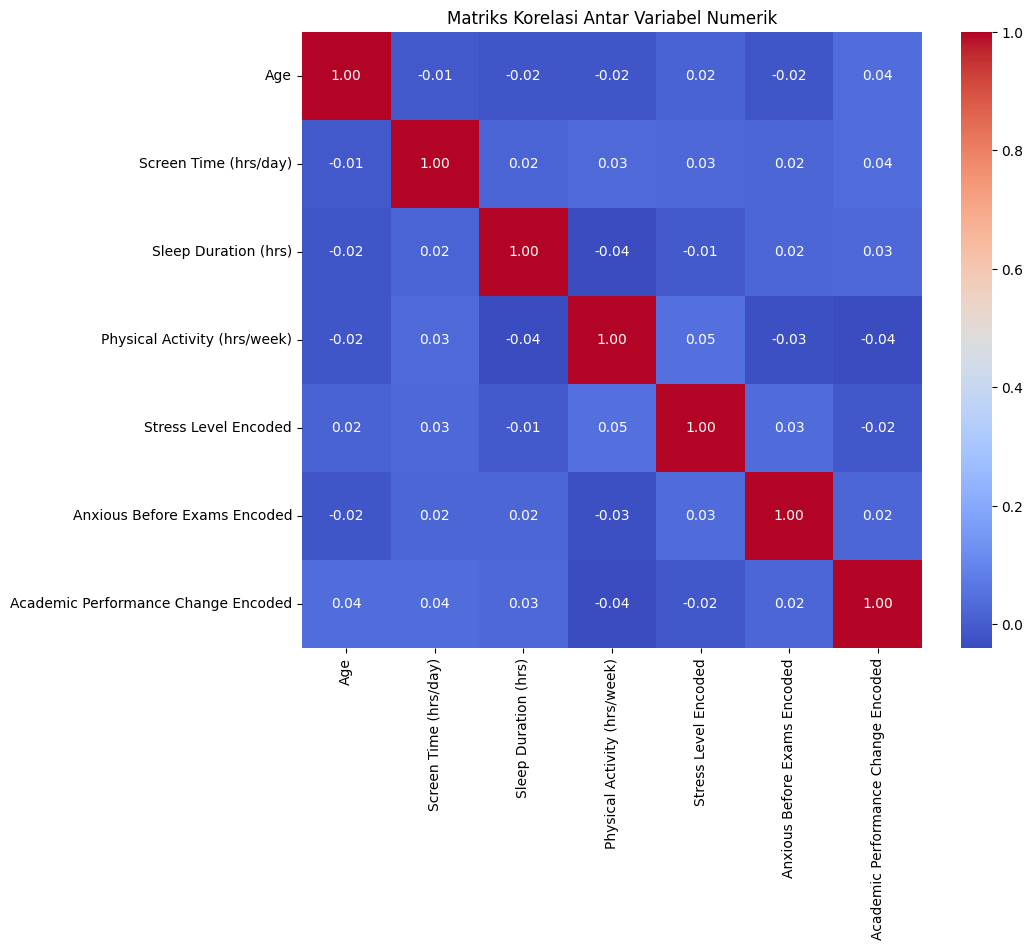

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)',
                  'Stress Level Encoded', 'Anxious Before Exams Encoded', 'Academic Performance Change Encoded']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()


**Reasoning**:
As instructed, I will now create histograms for the numerical columns 'Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', and 'Physical Activity (hrs/week)' to visualize their distributions.



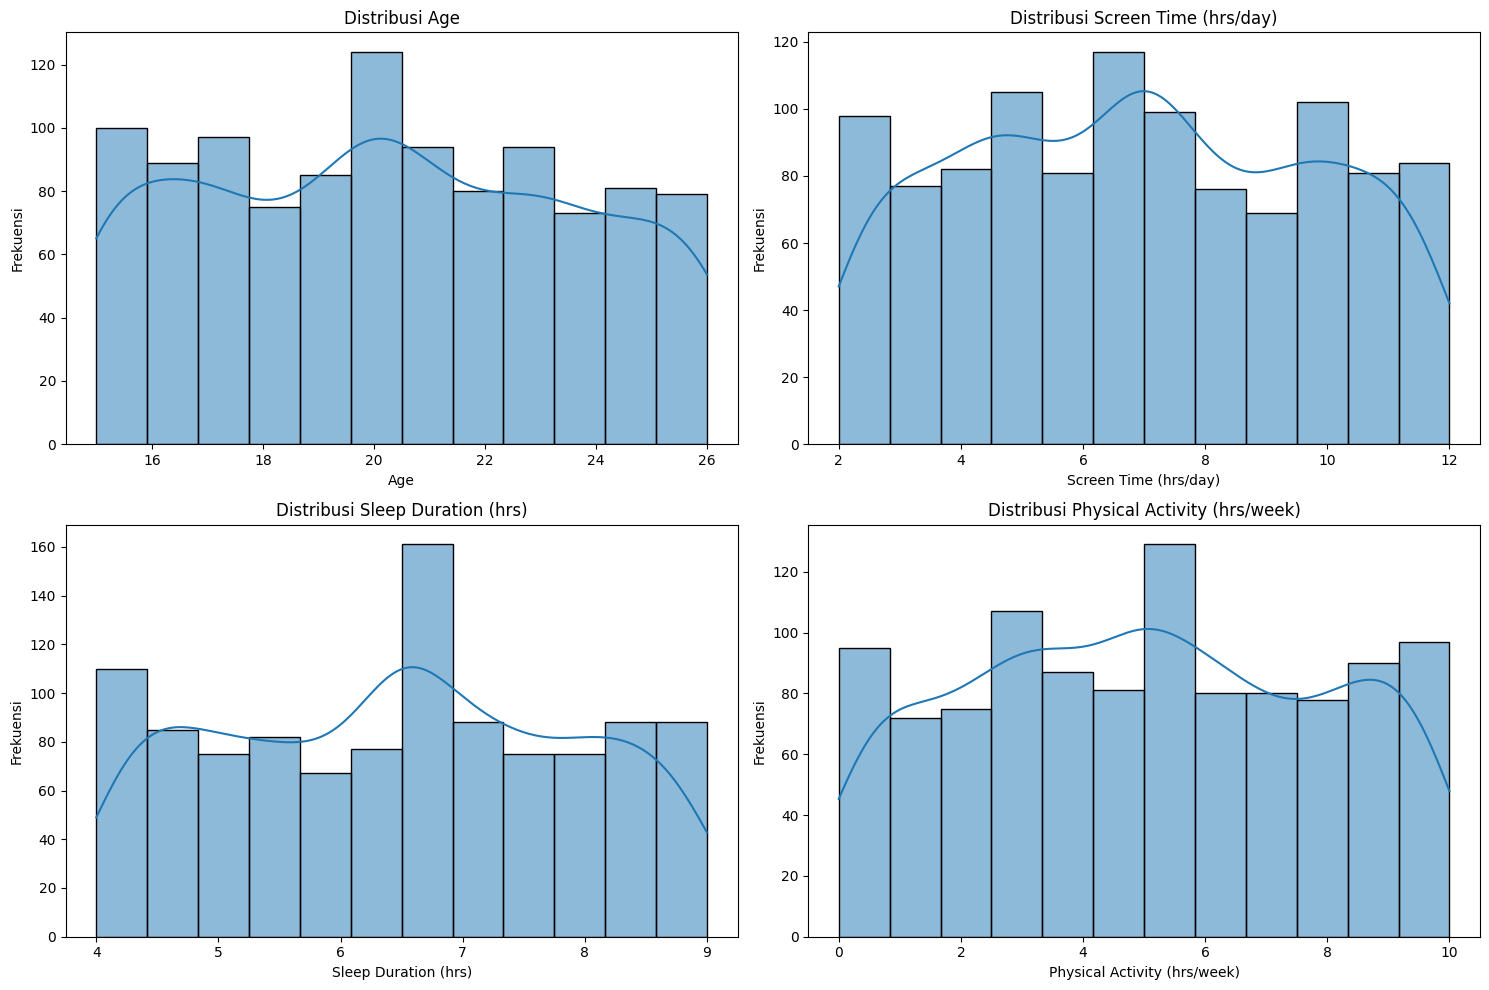

In [ ]:
numerical_cols_for_hist = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_hist, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

**Reasoning**:
As instructed, I will now create bar plots or count plots to visualize the distribution of values for the 'Gender' (using one-hot encoded columns), 'Education Level' (using one-hot encoded columns), 'Stress Level Encoded', 'Anxious Before Exams Encoded', and 'Academic Performance Change Encoded' columns.



/tmp/ipython-input-1046680416.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress Level Encoded', data=df, palette='viridis')
/tmp/ipython-input-1046680416.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anxious Before Exams Encoded', data=df, palette='viridis')
/tmp/ipython-input-1046680416.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Academic Performance Change Encoded', data=df, palette='viridis')


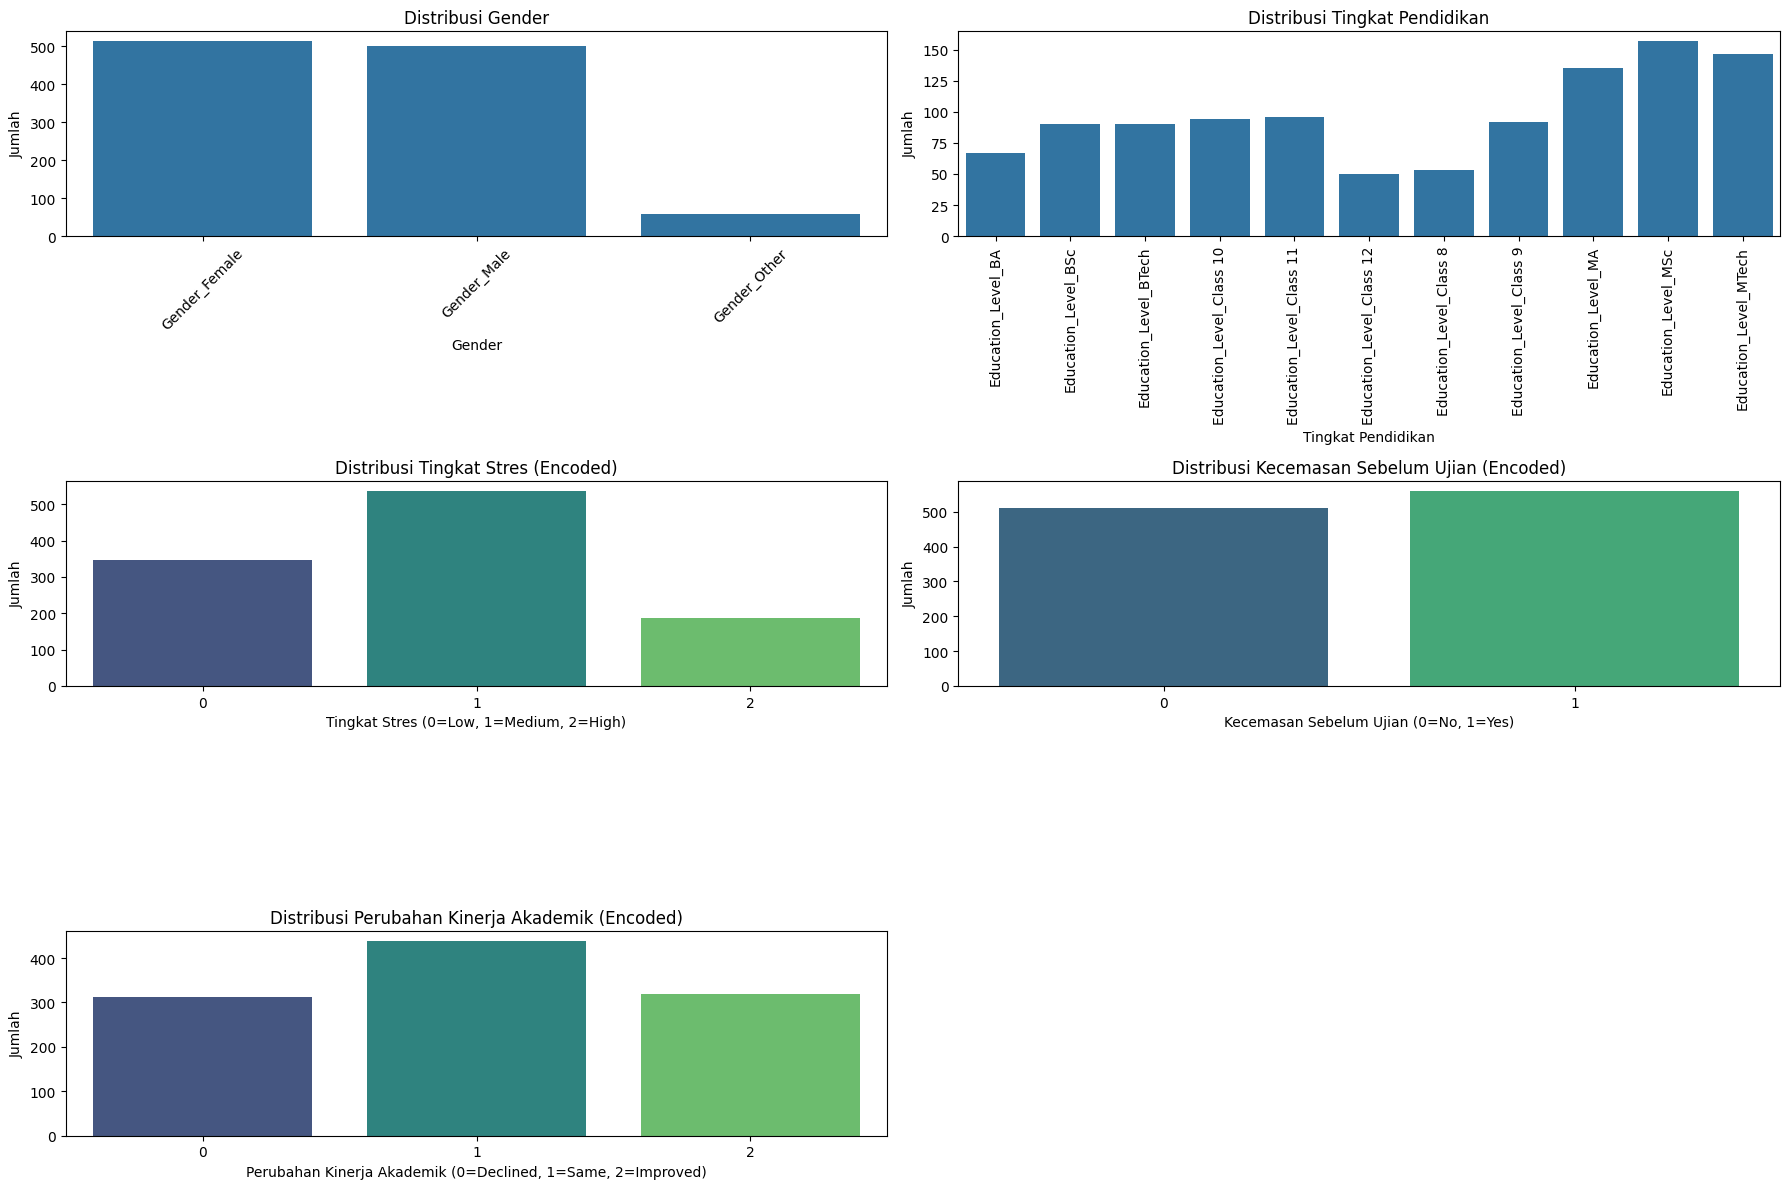

In [ ]:
plt.figure(figsize=(18, 12))

# Plotting Gender distribution from one-hot encoded columns
gender_cols = [col for col in df.columns if 'Gender_' in col]
gender_counts = df[gender_cols].sum()
plt.subplot(3, 2, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

# Plotting Education Level distribution from one-hot encoded columns
edu_cols = [col for col in df.columns if 'Education_Level_' in col]
edu_counts = df[edu_cols].sum()
plt.subplot(3, 2, 2)
sns.barplot(x=edu_counts.index, y=edu_counts.values)
plt.title('Distribusi Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)

# Plotting Stress Level Encoded distribution
plt.subplot(3, 2, 3)
sns.countplot(x='Stress Level Encoded', data=df, palette='viridis')
plt.title('Distribusi Tingkat Stres (Encoded)')
plt.xlabel('Tingkat Stres (0=Low, 1=Medium, 2=High)')
plt.ylabel('Jumlah')

# Plotting Anxious Before Exams Encoded distribution
plt.subplot(3, 2, 4)
sns.countplot(x='Anxious Before Exams Encoded', data=df, palette='viridis')
plt.title('Distribusi Kecemasan Sebelum Ujian (Encoded)')
plt.xlabel('Kecemasan Sebelum Ujian (0=No, 1=Yes)')
plt.ylabel('Jumlah')

# Plotting Academic Performance Change Encoded distribution
plt.subplot(3, 2, 5)
sns.countplot(x='Academic Performance Change Encoded', data=df, palette='viridis')
plt.title('Distribusi Perubahan Kinerja Akademik (Encoded)')
plt.xlabel('Perubahan Kinerja Akademik (0=Declined, 1=Same, 2=Improved)')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages because the `palette` argument was used without assigning a `hue` in `sns.countplot`. To address this, I will update the `sns.countplot` calls by explicitly setting `hue` to the same column as `x` and adding `legend=False` to suppress the warnings and ensure future compatibility.



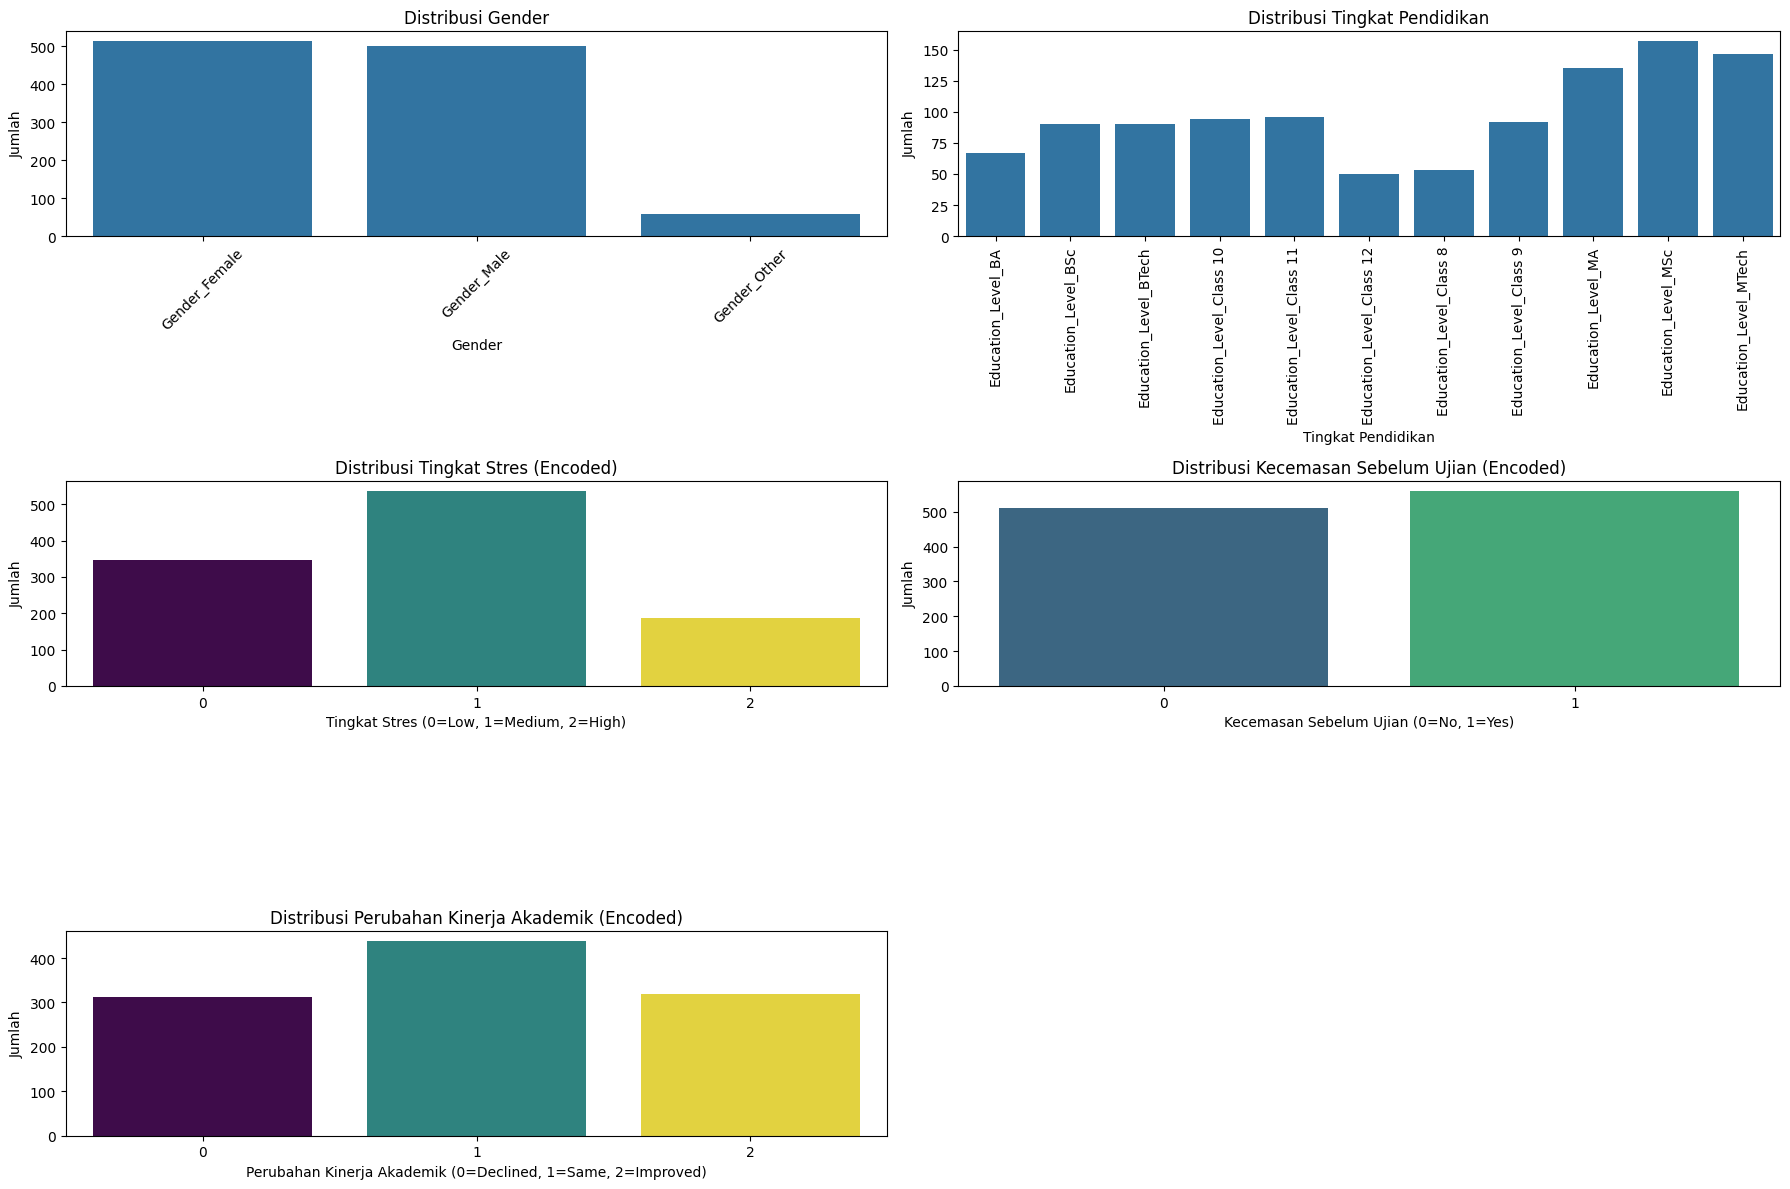

In [ ]:
plt.figure(figsize=(18, 12))

# Plotting Gender distribution from one-hot encoded columns
gender_cols = [col for col in df.columns if 'Gender_' in col]
gender_counts = df[gender_cols].sum()
plt.subplot(3, 2, 1)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

# Plotting Education Level distribution from one-hot encoded columns
edu_cols = [col for col in df.columns if 'Education_Level_' in col]
edu_counts = df[edu_cols].sum()
plt.subplot(3, 2, 2)
sns.barplot(x=edu_counts.index, y=edu_counts.values)
plt.title('Distribusi Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)

# Plotting Stress Level Encoded distribution
plt.subplot(3, 2, 3)
sns.countplot(x='Stress Level Encoded', data=df, palette='viridis', hue='Stress Level Encoded', legend=False)
plt.title('Distribusi Tingkat Stres (Encoded)')
plt.xlabel('Tingkat Stres (0=Low, 1=Medium, 2=High)')
plt.ylabel('Jumlah')

# Plotting Anxious Before Exams Encoded distribution
plt.subplot(3, 2, 4)
sns.countplot(x='Anxious Before Exams Encoded', data=df, palette='viridis', hue='Anxious Before Exams Encoded', legend=False)
plt.title('Distribusi Kecemasan Sebelum Ujian (Encoded)')
plt.xlabel('Kecemasan Sebelum Ujian (0=No, 1=Yes)')
plt.ylabel('Jumlah')

# Plotting Academic Performance Change Encoded distribution
plt.subplot(3, 2, 5)
sns.countplot(x='Academic Performance Change Encoded', data=df, palette='viridis', hue='Academic Performance Change Encoded', legend=False)
plt.title('Distribusi Perubahan Kinerja Akademik (Encoded)')
plt.xlabel('Perubahan Kinerja Akademik (0=Declined, 1=Same, 2=Improved)')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

## Ringkasan:

### Temuan Utama Analisis Data

*   **Kualitas Data Awal:** Dataset mentah berisi 1250 entri dan 10 kolom. Dataset ini mengalami masalah kualitas data yang signifikan, termasuk 178 baris duplikat dan nilai yang hilang di semua kolom. Kolom-kolom utama seperti 'Usia' dan 'Waktu Layar (jam/hari)' memiliki nilai string yang tidak konsisten ('twenty', 'unknown') dan rentang numerik yang tidak realistis (misalnya, 'Usia' dari 1 hingga 200, 'Waktu Layar' dari -5 hingga 150).
*   **Efektivitas Pembersihan Data:**
    *   Baris duplikat berhasil dihapus, mengurangi ukuran dataset.
    *   Nilai yang tidak konsisten di 'Usia' dan 'Waktu Layar (jam/hari)' distandarisasi, dan nilai numerik yang tidak realistis di 'Usia', 'Waktu Layar (jam/hari)', 'Durasi Tidur (jam)', dan 'Aktivitas Fisik (jam/minggu)' diidentifikasi dan diganti dengan NaN.
    *   Nilai numerik yang hilang diisi menggunakan median, dan nilai kategorikal yang hilang diisi menggunakan modus.
    *   Setelah pembersihan, hanya kolom 'Nama' yang mempertahankan 10 nilai yang hilang; semua kolom analitis penting lainnya bebas dari data yang hilang. DataFrame dikurangi menjadi 1071 entri unik.
*   **Transformasi Data:**
    *   Kolom 'Nama' dihapus karena dianggap tidak relevan untuk analisis.
    *   Variabel kategorikal 'Tingkat Stres', 'Cemas Sebelum Ujian', dan 'Perubahan Kinerja Akademik' berhasil diubah menjadi representasi ordinal numerik ('Tingkat Stres Terkode': 0=Rendah, 1=Sedang, 2=Tinggi; 'Cemas Sebelum Ujian Terkode': 0=Tidak, 1=Ya; 'Perubahan Kinerja Akademik Terkode': 0=Menurun, 1=Sama, 2=Meningkat).
    *   'Jenis Kelamin' dan 'Tingkat Pendidikan' dienkode one-hot, membuat kolom biner baru untuk setiap kategori.
*   **Observasi Awal EDA:**
    *   Statistik deskriptif dihasilkan untuk semua kolom numerik dan terkode, memberikan gambaran umum tentang distribusinya.
    *   Heatmap korelasi dibuat untuk memvisualisasikan hubungan linier antar variabel.
    *   Histogram menunjukkan distribusi 'Usia', 'Waktu Layar (jam/hari)', 'Durasi Tidur (jam)', dan 'Aktivitas Fisik (jam/minggu)'.
    *   Diagram batang menampilkan distribusi 'Jenis Kelamin', 'Tingkat Pendidikan', 'Tingkat Stres', 'Cemas Sebelum Ujian', dan 'Perubahan Kinerja Akademik'.

### Wawasan atau Langkah Selanjutnya

*   **Selidiki kolom 'Nama':** Meskipun tidak penting untuk analisis ini, penyelidikan lebih lanjut mungkin diperlukan jika identifikasi siswa menjadi persyaratan di masa mendatang. Untuk tujuan analitis saat ini, penghapusannya sudah tepat.
*   **Mendalami Korelasi:** Heatmap korelasi yang dihasilkan memberikan dasar; langkah selanjutnya harus melibatkan analisis terperinci tentang korelasi spesifik, terutama antara indikator kesehatan mental (stres, kecemasan) dan kinerja akademik atau faktor gaya hidup, untuk mengungkap potensi hubungan dan wawasan yang dapat ditindaklanjuti.